In [2]:
import os
import numpy as np
import imageio
import cv2
import copy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,adjusted_rand_score
from sklearn import naive_bayes
face_path = './yalefaces/'
X = []
y_hum = []
y_exp = [] 
#如subject02.centerlight，其y_hum为02，y_exp为centerlight
        
for file in os.listdir(face_path):
    infos = file.split('.')
    hum = infos[0].split('t')[-1]
    ## label starts from 0
    hum = int(hum) - 1
    exp = infos[1]
    y_hum.append(hum)
    y_exp.append(exp)
    print(exp)
    ## image
    im_fn = os.path.join(face_path, file)
    gif = imageio.mimread(im_fn)
    gif = gif[0]
    gif = np.array(gif)
    X.append(gif)

glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
happy
leftlight
noglasses
normal
rightlight
sad
sleepy
surprised
wink
centerlight
glasses
ha

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
X = np.array(X)
n_class = max(y_hum) + 1
## flatten
#X = X.reshape((X.shape[0], -1))

In [4]:
#分训练集和测试集，构建标签，只作为样例
x_train, x_test, y_train, y_test = train_test_split(X, y_hum, train_size = 0.6, random_state = 0)
y_one_hot = label_binarize(y=y_test,classes=np.arange(n_class))  
x_train.shape

(98, 243, 320)

In [5]:
def PCA2D(samples,goal_dim):
    size = samples[0].shape
    # m*n matrix
    mean = np.zeros(size)

    for s in samples:
        mean = mean + s

    # get the mean of all samples
    mean /= float(len(samples))

    # n*n matrix
    cov_row = np.zeros((size[1],size[1]))
    for s in samples:
        diff = s - mean;
        cov_row = cov_row + np.dot(diff.T, diff)
    cov_row /= float(len(samples))
    row_eval, row_evec = np.linalg.eig(cov_row)
    # select the top t evals
    sorted_index = np.argsort(row_eval)
    # using slice operation to reverse
    X = row_evec[:,sorted_index[:-goal_dim-1 : -1]]
    return X

In [6]:
def L1PCA2D(x,out_n = 2):
    w = np.ones(shape = (out_n,x.shape[2]))
    X = copy.copy(x)
    # 收的得到第一个w
    for epoch in range(100):
        w_t = w[0] # （w,1）
        top = np.zeros(shape = (1,X.shape[2])) # (1,w)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                xi = X[i,j] # (1,w)
                pijt = 0
                if xi.dot(w_t)>=0: # (1,w)@(w,1)
                    pijt = 1
                else:
                    pijt = -1
                top += (pijt * xi.T)     #(w,1)
        bottom = np.sqrt(np.sum(top**2))
        w[0] = top/bottom
       
    for k in range(1,out_n):
        for i in range(X.shape[0]):
            for j in range(x.shape[1]):
                b = (X[i,j].dot(w[k-1]))*(w[k-1].T)   
                X[i,j] = X[i,j] - b
        for epoch in range(100):
            w_t = w[k-1]
            top = np.zeros(shape = (1,X.shape[2])) # (1,w)
            for i in range(x.shape[0]):
                for j in range(x.shape[1]):
                    xi = X[i,j] # (1,w)
                    pijt = 0
                    if xi.dot(w_t)>=0: # (1,w)@(w,1)
                        pijt = 1
                    else:
                        pijt = -1
                    top += (pijt * xi.T)     #(w,1)
            bottom = np.sqrt(np.sum(top**2))
            w[k-1] = top/bottom
    return w.T


In [7]:
def PCA2_2D(samples, row_top, col_top):
    size = samples[0].shape
    # m*n matrix
    mean = np.zeros(size)

    for s in samples:
        mean = mean + s

    # get the mean of all samples
    mean /= float(len(samples))

    # n*n matrix
    cov_row = np.zeros((size[1],size[1]))
    for s in samples:
        diff = s - mean;
        cov_row = cov_row + np.dot(diff.T, diff)
    cov_row /= float(len(samples))
    row_eval, row_evec = np.linalg.eig(cov_row)
    # select the top t evals
    sorted_index = np.argsort(row_eval)
    # using slice operation to reverse
    X = row_evec[:,sorted_index[:-row_top-1 : -1]]

    # m*m matrix
    cov_col = np.zeros((size[0], size[0]))
    for s in samples:
        diff = s - mean;
        cov_col += np.dot(diff,diff.T)
    cov_col /= float(len(samples))
    col_eval, col_evec = np.linalg.eig(cov_col)
    sorted_index = np.argsort(col_eval)
    Z = col_evec[:,sorted_index[:-col_top-1 : -1]]

    return X, Z

In [8]:
X_L1= L1PCA2D(x_train,1)
X_L2= PCA2D(x_train,1)

In [11]:
res= np.dot(x_test, X_L1)
l1=np.squeeze(res)
res= np.dot(x_test, X_L2)
l2=np.squeeze(res)
l3=x_train.reshape((98,243*320))
l4=x_test.reshape((66,243*320))

In [12]:
pca_1 = PCA(n_components=2)
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=2)
L1_2D=pca_1.fit_transform(l1)
L2_2D=pca_2.fit_transform(l2)
pca_3.fit(l3)
L2_1D=pca_3.transform(l4)

In [15]:
cmap = mpl.cm.get_cmap("Set1", 15)
colors = cmap(np.linspace(0, 1, len(y_test)))

在分类任务中，请注意不要使用太强的分类器，比如SVM。理论上SVM是一个比PCA更高阶的模型。可以不依赖前期的特征正交化来进行分类学习。用来诠释PCA的效果有问题。
本次作业主要要求以下任务任务可以考虑：（基础部分要求前三个必做，后两个可选。）

* 样本分布可视化对比

In [16]:
def show(A,B):
    fig,ax=plt.subplots()
    ax.scatter(A[:,0],A[:,1],c=colors)
    for index,txt in enumerate(B):
        ax.annotate(txt,(A[index][0],A[index][1]))

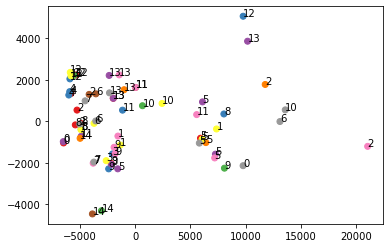

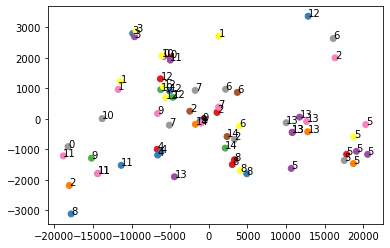

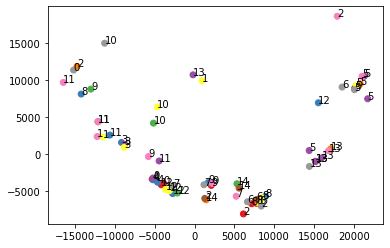

In [17]:
show(L1_2D,y_test)
show(L2_2D,y_test)
show(L2_1D,y_test)

* 聚类算法效果对比（可以不限于k-means，请计算召回率/准确率/F值作为定量指标）


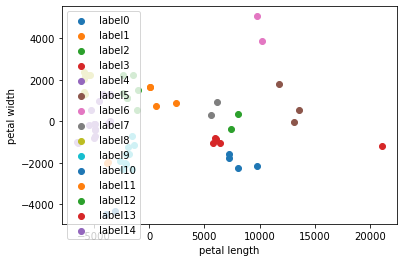

准确率:0.106
调整兰德指数:0.347


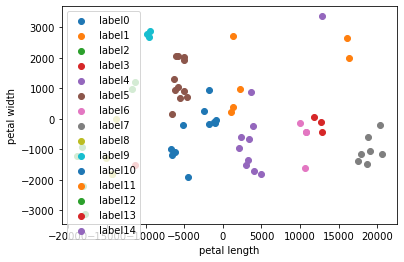

准确率:0.061
调整兰德指数:0.341


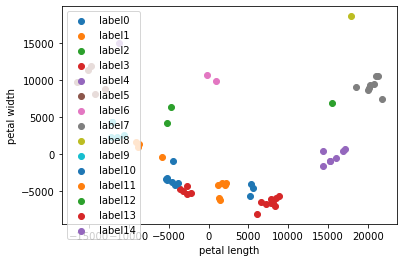

准确率:0.000
调整兰德指数:0.425


In [18]:
def k_show(A,B,n):
    estimator = KMeans(n_clusters=n)#构造聚类器
    estimator.fit(A)#聚类
    label_pred = estimator.labels_ #获取聚类标签
    x=[]
    for i in range(n):
        x.append(A[label_pred == i])
        plt.scatter(x[i][:, 0], x[i][:, 1],label='label{}'.format(i))
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(loc=2)
    plt.show()
    accuracy=accuracy_score(B, label_pred)
    rand_score=adjusted_rand_score(B, label_pred)
    print('准确率:{:.3f}'.format(accuracy))
    print('调整兰德指数:{:.3f}'.format(rand_score))
    return
k_show(L1_2D,y_test,15)
k_show(L2_2D,y_test,15)
k_show(L2_1D,y_test,15)

* 分类对比（可以使用KNN、朴素贝叶斯等分类器）

In [35]:
def Bayes_2D(x):
    train=np.dot(x_train, x)
    train=np.squeeze(train)
    model=naive_bayes.GaussianNB()  # 高斯贝叶斯
    model.fit(train,y_train)
    test=np.dot(x_test, x)
    test=np.squeeze(test)
    predict=model.predict(test)
    print(predict)
    print('贝叶斯准确率:{:.3f}'.format(model.score(test, y_test)))
def Bayes_1D(goal):
    pca= PCA(n_components=goal)
    train=pca.fit_transform(l3)
    model=naive_bayes.GaussianNB()  # 高斯贝叶斯
    model.fit(train,y_train)
    test=pca.transform(l4)
    predict=model.predict(test)
    print(predict)
    print('贝叶斯准确率:{:.3f}'.format(model.score(test, y_test)))

In [36]:
Bayes_2D(X_L1)
Bayes_2D(X_L2)
Bayes_1D(4)

[13  8  9  7  8  5 12  8  2  8  4  8 12  8  5 11  9  6  3  7 10 12  1  5
 13  7  8  7 13  8  3  5  8  3 13 12  7  8 12  3  5 10  6  8  2  7  8 13
  9 13  4  9  5 13  5  9  1  3  8  8  6  3  3  5  9  8]
贝叶斯准确率:0.455
[13  8  9 10  8  5 12 10  2 10 13  8 12 10  4  1  1  7  1  7 10 12  1  5
 13 10 13 14  4 10 14  5  9  3 13 12  3  8 12  0  5 10  1  8  2  7  8  1
  6  1 14 10  3 13  5  9  1 13  8 10  6  3  3  5  6 13]
贝叶斯准确率:0.439
[13  8  9  0  7  5  0  4  2  4 14  8 12  4  5  1  1  9 14  2 10 12  1  5
 13  0 13 13  5 11 13  5  2  5 13  0  1  8 12  0  5 10  1  2  2  2  2  1
  2  1 14 10  5 13  5  9  1 14  2 12  2  5  5 13  9  8]
贝叶斯准确率:0.485


* 个案效果对比分析讨论（可选）

In [92]:
def rebuild_2D(goal,start,end):
    test=[]
    for i in range(start,end,10):
        X=(PCA2D(x_train,i))
        test.append(np.dot(np.dot(x_test[goal],X),X.T))
    for i in range(len(test)):
        plt.subplot(int((end-start)/30)+1,3,i+1)
        plt.imshow(test[i],cmap='gray')

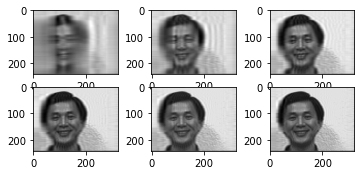

In [93]:
rebuild_2D(5,10,70)

In [90]:
def rebuild_1D(goal,start,end):
    img=[]
    train=x_train.reshape((98,243*320))
    for i in range(start,end,10):
        pca= PCA(n_components=i)
        pca.fit(train)
        X_tmp=pca.inverse_transform(pca.transform(x_test[goal].reshape((1,243*320))))
        img.append(X_tmp.reshape((243,320)))
    for i in range(len(img)):
        plt.subplot(int((end-start)/30)+1,3,i+1)
        plt.imshow(img[i],cmap='gray')

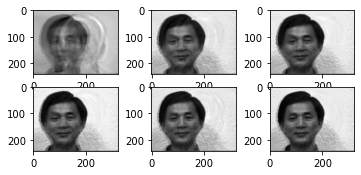

In [91]:
rebuild_1D(5,10,70)

* 其他深入讨论与模型理解探讨（可选）

In [96]:
def rebuild2_2D(goal,start,end):
    img=[]
    for i in range(start,end,10):
            X,Z=PCA2_2D(x_train,i,i)
            res = np.dot(Z.T, np.dot(x_test[goal], X))
            img.append(np.dot(Z, np.dot(res, X.T)))
    for i in range(len(img)):
        plt.subplot(int((end-start)/30)+1,3,i+1)
        plt.imshow(img[i],cmap='gray')

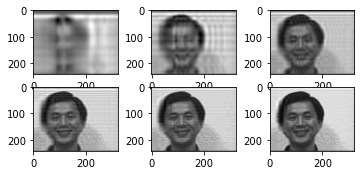

In [97]:
rebuild2_2D(5,10,70)

请把内容（除了给的数据集，但如果用到自己造的数据或者新的数据集的话请一并打包）打包为压缩文件，命名为Image-pca-学号-姓名上传。
作业截止时间：29号。如果希望在课堂上进行交流，请在26号前提交。被邀请课堂交流的同学会有额外5%加分（不受20%上限约束）。延期提交（最高90分，可加分）时间5月6号。5月6号后提交的最高80分，不再有加分项。